<a href="https://colab.research.google.com/github/shaileshsuthar675/Machine-Learning/blob/main/Survival%20Rate%20At%20Titanic/By_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df=pd.read_csv('/content/gdrive/MyDrive/machine learning /titanic.csv',index_col=0)

In [53]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [55]:
df['Age']=df['Age'].fillna(df.Age.mean())

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [58]:
df=df.drop(columns=['Cabin','Embarked','Name','Ticket', 'Fare'],axis='columns')

In [59]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
df.Sex=le_sex.fit_transform(df.Sex)

In [61]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,1,22.0,1,0
2,1,1,0,38.0,1,0
3,1,3,0,26.0,0,0


In [85]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='Survived',axis='columns')
y=df.Survived
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [81]:
len(x_train)

712

In [82]:
len(x_test)

179

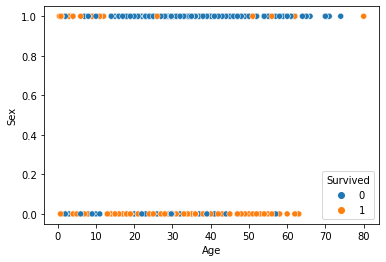

In [83]:
sns.scatterplot(data=df,x='Age',y='Sex',hue='Survived')

In [86]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8324022346368715

In [87]:
model.predict([[0,0,22,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])